In [1]:
from barrier3d import Barrier3d
from matplotlib import pyplot as plt
from cascade.outwasher_shorter_beach import Outwasher
import numpy as np
import os
import copy

# Ki 7.5E-3

In [2]:
b3d = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
# years = np.load("C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/outwash_years.npy")

for t in range(1, 64):
    print('B3D time step: ', b3d._time_index)
    b3d.update()
    b3d.update_dune_domain()
outwash = Outwasher(
        datadir="C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/",
        outwash_years="outwash_years.npy",
        outwash_bay_levels="outwash_baylevels10.npy",
        time_step_count=b3d._TMAX,
        berm_elev=b3d._BermEl,
        barrier_length=b3d._BarrierLength,
        sea_level=b3d._SL,
        bay_depth=-b3d._BayDepth,
        interior_domain=b3d.InteriorDomain,
        dune_domain=b3d.DuneDomain[b3d._time_index - 1],
        block_size = 5,
        substep=20,
        sediment_flux_coefficient_Cx=10,
        sediment_flux_coefficient_Ki=7.5E-3,  # b3d = 7.5E-6 for inundation
        max_slope=-0.25,
        shoreface_on=True)
outwash.update(b3d)

B3D time step:  1
B3D time step:  2
B3D time step:  3
B3D time step:  4
B3D time step:  5
B3D time step:  6
B3D time step:  7
B3D time step:  8
B3D time step:  9
B3D time step:  10
B3D time step:  11
B3D time step:  12
B3D time step:  13
B3D time step:  14


c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1360: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1361: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1362: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


B3D time step:  15
B3D time step:  16
B3D time step:  17
B3D time step:  18
B3D time step:  19
B3D time step:  20
B3D time step:  21
B3D time step:  22
B3D time step:  23
B3D time step:  24
B3D time step:  25
B3D time step:  26
B3D time step:  27
B3D time step:  28
B3D time step:  29
B3D time step:  30
B3D time step:  31
B3D time step:  32
B3D time step:  33
B3D time step:  34
B3D time step:  35
B3D time step:  36
B3D time step:  37
B3D time step:  38
B3D time step:  39
B3D time step:  40
B3D time step:  41
B3D time step:  42
B3D time step:  43
B3D time step:  44
B3D time step:  45
B3D time step:  46
B3D time step:  47
B3D time step:  48
B3D time step:  49
B3D time step:  50
B3D time step:  51
B3D time step:  52
B3D time step:  53
B3D time step:  54
B3D time step:  55
B3D time step:  56
B3D time step:  57
B3D time step:  58
B3D time step:  59
B3D time step:  60
B3D time step:  61
B3D time step:  62
B3D time step:  63
Outwasher time step:  0
Outwasher time step:  1
Outwasher time step: 

Outwasher time step:  284
Outwasher time step:  285
Outwasher time step:  286
Outwasher time step:  287
Outwasher time step:  288
Outwasher time step:  289
Outwasher time step:  290
Outwasher time step:  291
Outwasher time step:  292
Outwasher time step:  293
Outwasher time step:  294
Outwasher time step:  295
Outwasher time step:  296
Outwasher time step:  297
Outwasher time step:  298
Outwasher time step:  299
Outwasher time step:  300
Outwasher time step:  301
Outwasher time step:  302
Outwasher time step:  303
Outwasher time step:  304
Outwasher time step:  305
Outwasher time step:  306
Outwasher time step:  307
Outwasher time step:  308
Outwasher time step:  309
Outwasher time step:  310
Outwasher time step:  311
Outwasher time step:  312
Outwasher time step:  313
Outwasher time step:  314
Outwasher time step:  315
Outwasher time step:  316
Outwasher time step:  317
Outwasher time step:  318
Outwasher time step:  319
Outwasher time step:  320
Outwasher time step:  321
Outwasher ti

In [3]:
round(outwash._Qs_shoreface[b3d._time_index-1]) # m^3

6450

In [4]:
round(outwash._Qs_shoreface_per_length[b3d._time_index-1]) # m^3/m

13

In [5]:
print("min velocities (m/s) are: ", min(outwash.velocities))
print("max velocities (m/s) are: ", max(outwash.velocities))
print("mean velocities (m/s) are: ", np.mean(outwash.velocities))

min velocities (m/s) are:  0.5586227390729783
max velocities (m/s) are:  6.841062024281863
mean velocities (m/s) are:  2.1943828230644917


In [6]:
print("min flows (m3/s) are: ", min(outwash.flows))
print("max flows (m3/s) are: ", max(outwash.flows))
print("meav flows (m3/s) are: ", np.mean(outwash.flows))

min flows (m3/s) are:  0.08894053929156862
max flows (m3/s) are:  163.34825993639774
meav flows (m3/s) are:  13.57809359290897


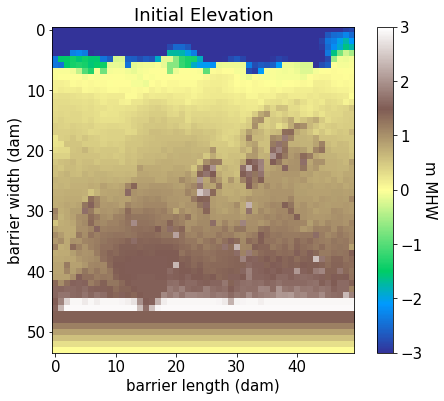

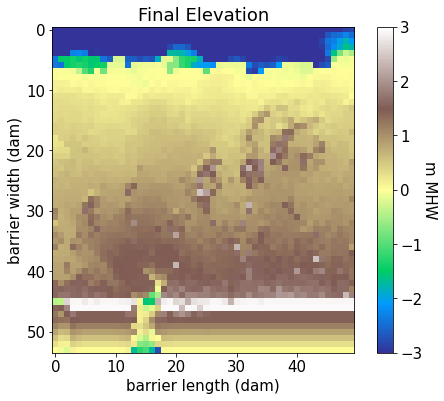

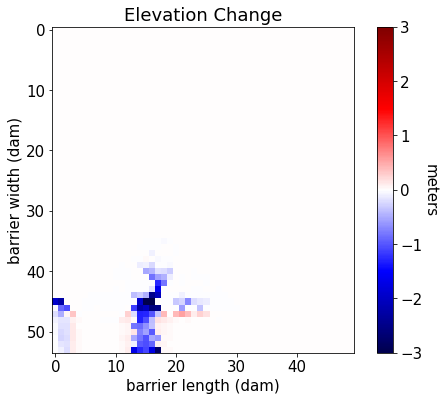

In [7]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

initial_domain = outwash._initial_full_domain
final_domain = outwash._full_domain
domain_change = final_domain-initial_domain

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-3, vmax=3,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)

# Ki 7.5E-2, substep 20

In [7]:
b3d2 = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
# years = np.load("C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/outwash_years.npy")

for t in range(1, 64):
    print('B3D time step: ', b3d2._time_index)
    b3d2.update()
    b3d2.update_dune_domain()
outwash2 = Outwasher(
        datadir="C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/",
        outwash_years="outwash_years.npy",
        outwash_bay_levels="outwash_baylevels10.npy",
        time_step_count=b3d2._TMAX,
        berm_elev=b3d2._BermEl,
        barrier_length=b3d2._BarrierLength,
        sea_level=b3d2._SL,
        bay_depth=-b3d2._BayDepth,
        interior_domain=b3d2.InteriorDomain,
        dune_domain=b3d2.DuneDomain[b3d2._time_index - 1],
        block_size = 5,
        substep=20,
        sediment_flux_coefficient_Cx=10,
        sediment_flux_coefficient_Ki=7.5E-2,  # b3d = 7.5E-6 for inundation
        max_slope=-0.25,
        shoreface_on=True)
outwash2.update(b3d2)

B3D time step:  1
B3D time step:  2
B3D time step:  3
B3D time step:  4
B3D time step:  5
B3D time step:  6
B3D time step:  7
B3D time step:  8
B3D time step:  9
B3D time step:  10
B3D time step:  11
B3D time step:  12
B3D time step:  13
B3D time step:  14
B3D time step:  15
B3D time step:  16
B3D time step:  17
B3D time step:  18
B3D time step:  19
B3D time step:  20
B3D time step:  21
B3D time step:  22
B3D time step:  23
B3D time step:  24
B3D time step:  25
B3D time step:  26
B3D time step:  27
B3D time step:  28
B3D time step:  29
B3D time step:  30
B3D time step:  31
B3D time step:  32
B3D time step:  33
B3D time step:  34
B3D time step:  35
B3D time step:  36
B3D time step:  37
B3D time step:  38
B3D time step:  39
B3D time step:  40
B3D time step:  41
B3D time step:  42
B3D time step:  43
B3D time step:  44
B3D time step:  45
B3D time step:  46
B3D time step:  47
B3D time step:  48
B3D time step:  49
B3D time step:  50
B3D time step:  51
B3D time step:  52
B3D time step:  53
B3

Outwasher time step:  274
Outwasher time step:  275
Outwasher time step:  276
Outwasher time step:  277
Outwasher time step:  278
Outwasher time step:  279
Outwasher time step:  280
Outwasher time step:  281
Outwasher time step:  282
Outwasher time step:  283
Outwasher time step:  284
Outwasher time step:  285
Outwasher time step:  286
Outwasher time step:  287
Outwasher time step:  288
Outwasher time step:  289
Outwasher time step:  290
Outwasher time step:  291
Outwasher time step:  292
Outwasher time step:  293
Outwasher time step:  294
Outwasher time step:  295
Outwasher time step:  296
Outwasher time step:  297
Outwasher time step:  298
Outwasher time step:  299
Outwasher time step:  300
Outwasher time step:  301
Outwasher time step:  302
Outwasher time step:  303
Outwasher time step:  304
Outwasher time step:  305
Outwasher time step:  306
Outwasher time step:  307
Outwasher time step:  308
Outwasher time step:  309
Outwasher time step:  310
Outwasher time step:  311
Outwasher ti

In [8]:
round(outwash2._Qs_shoreface[b3d2._time_index-1]) # m^3

15488

In [10]:
round(outwash2._Qs_shoreface_per_length[b3d2._time_index-1]) # m^3/m

31

In [12]:
print("min velocities (m/s) are: ", min(outwash2.velocities))
print("max velocities (m/s) are: ", max(outwash2.velocities))
print("mean velocities (m/s) are: ", np.mean(outwash2.velocities))
print("min flows (m3/s) are: ", min(outwash2.flows))
print("max flows (m3/s) are: ", max(outwash2.flows))
print("meav flows (m3/s) are: ", np.mean(outwash2.flows))

min velocities (m/s) are:  0.12287339432078119
max velocities (m/s) are:  7.933579482527609
mean velocities (m/s) are:  3.5937784600637404
min flows (m3/s) are:  0.0009464931942388772
max flows (m3/s) are:  254.77186125626628
meav flows (m3/s) are:  35.93929955960008


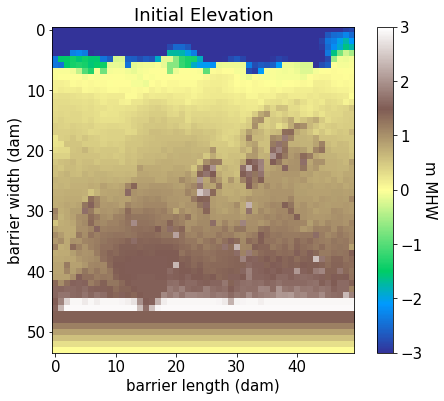

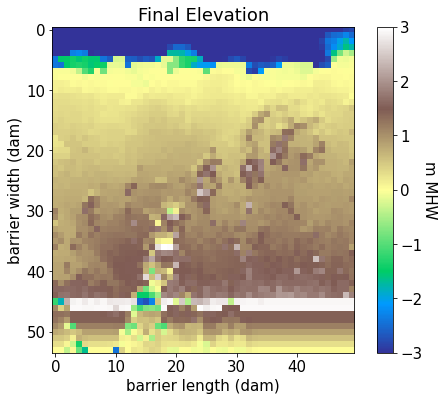

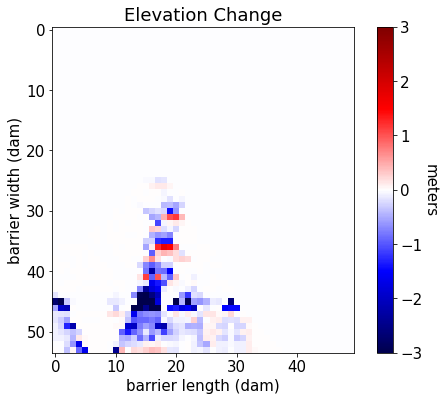

In [13]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

initial_domain = outwash2._initial_full_domain
final_domain = outwash2._full_domain
domain_change = final_domain-initial_domain

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-3, vmax=3,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)

# Ki 7.5E-2, substep 120

In [2]:
b3d3 = Barrier3d.from_yaml("C:/Users/Lexi/PycharmProjects/Barrier3d/tests/test_params/")
# years = np.load("C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/outwash_years.npy")

for t in range(1, 64):
    print('B3D time step: ', b3d3._time_index)
    b3d3.update()
    b3d3.update_dune_domain()
outwash3 = Outwasher(
        datadir="C:/Users/Lexi/PycharmProjects/CASCADE/cascade/data/outwash_data/",
        outwash_years="outwash_years.npy",
        outwash_bay_levels="outwash_baylevels10.npy",
        time_step_count=b3d3._TMAX,
        berm_elev=b3d3._BermEl,
        barrier_length=b3d3._BarrierLength,
        sea_level=b3d3._SL,
        bay_depth=-b3d3._BayDepth,
        interior_domain=b3d3.InteriorDomain,
        dune_domain=b3d3.DuneDomain[b3d3._time_index - 1],
        block_size = 5,
        substep=120,
        sediment_flux_coefficient_Cx=10,
        sediment_flux_coefficient_Ki=7.5E-2,  # b3d = 7.5E-6 for inundation
        max_slope=-0.25,
        shoreface_on=True)
outwash3.update(b3d3)

B3D time step:  1
B3D time step:  2
B3D time step:  3
B3D time step:  4
B3D time step:  5
B3D time step:  6
B3D time step:  7
B3D time step:  8
B3D time step:  9
B3D time step:  10
B3D time step:  11
B3D time step:  12
B3D time step:  13
B3D time step:  14


c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1360: RuntimeWarning: invalid value encountered in double_scalars
  Qs1 = Qs0 * Q1 / (Q1 + Q2 + Q3)
c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1361: RuntimeWarning: invalid value encountered in double_scalars
  Qs2 = Qs0 * Q2 / (Q1 + Q2 + Q3)
c:\users\lexi\pycharmprojects\barrier3d\barrier3d\barrier3d.py:1362: RuntimeWarning: invalid value encountered in double_scalars
  Qs3 = Qs0 * Q3 / (Q1 + Q2 + Q3)


B3D time step:  15
B3D time step:  16
B3D time step:  17
B3D time step:  18
B3D time step:  19
B3D time step:  20
B3D time step:  21
B3D time step:  22
B3D time step:  23
B3D time step:  24
B3D time step:  25
B3D time step:  26
B3D time step:  27
B3D time step:  28
B3D time step:  29
B3D time step:  30
B3D time step:  31
B3D time step:  32
B3D time step:  33
B3D time step:  34
B3D time step:  35
B3D time step:  36
B3D time step:  37
B3D time step:  38
B3D time step:  39
B3D time step:  40
B3D time step:  41
B3D time step:  42
B3D time step:  43
B3D time step:  44
B3D time step:  45
B3D time step:  46
B3D time step:  47
B3D time step:  48
B3D time step:  49
B3D time step:  50
B3D time step:  51
B3D time step:  52
B3D time step:  53
B3D time step:  54
B3D time step:  55
B3D time step:  56
B3D time step:  57
B3D time step:  58
B3D time step:  59
B3D time step:  60
B3D time step:  61
B3D time step:  62
B3D time step:  63
Outwasher time step:  0
Outwasher time step:  1
Outwasher time step: 

Outwasher time step:  285
Outwasher time step:  286
Outwasher time step:  287
Outwasher time step:  288
Outwasher time step:  289
Outwasher time step:  290
Outwasher time step:  291
Outwasher time step:  292
Outwasher time step:  293
Outwasher time step:  294
Outwasher time step:  295
Outwasher time step:  296
Outwasher time step:  297
Outwasher time step:  298
Outwasher time step:  299
Outwasher time step:  300
Outwasher time step:  301
Outwasher time step:  302
Outwasher time step:  303
Outwasher time step:  304
Outwasher time step:  305
Outwasher time step:  306
Outwasher time step:  307
Outwasher time step:  308
Outwasher time step:  309
Outwasher time step:  310
Outwasher time step:  311
Outwasher time step:  312
Outwasher time step:  313
Outwasher time step:  314
Outwasher time step:  315
Outwasher time step:  316
Outwasher time step:  317
Outwasher time step:  318
Outwasher time step:  319
Outwasher time step:  320
Outwasher time step:  321
Outwasher time step:  322
Outwasher ti

Outwasher time step:  601
Outwasher time step:  602
Outwasher time step:  603
Outwasher time step:  604
Outwasher time step:  605
Outwasher time step:  606
Outwasher time step:  607
Outwasher time step:  608
Outwasher time step:  609
Outwasher time step:  610
Outwasher time step:  611
Outwasher time step:  612
Outwasher time step:  613
Outwasher time step:  614
Outwasher time step:  615
Outwasher time step:  616
Outwasher time step:  617
Outwasher time step:  618
Outwasher time step:  619
Outwasher time step:  620
Outwasher time step:  621
Outwasher time step:  622
Outwasher time step:  623
Outwasher time step:  624
Outwasher time step:  625
Outwasher time step:  626
Outwasher time step:  627
Outwasher time step:  628
Outwasher time step:  629
Outwasher time step:  630
Outwasher time step:  631
Outwasher time step:  632
Outwasher time step:  633
Outwasher time step:  634
Outwasher time step:  635
Outwasher time step:  636
Outwasher time step:  637
Outwasher time step:  638
Outwasher ti

Outwasher time step:  918
Outwasher time step:  919
Outwasher time step:  920
Outwasher time step:  921
Outwasher time step:  922
Outwasher time step:  923
Outwasher time step:  924
Outwasher time step:  925
Outwasher time step:  926
Outwasher time step:  927
Outwasher time step:  928
Outwasher time step:  929
Outwasher time step:  930
Outwasher time step:  931
Outwasher time step:  932
Outwasher time step:  933
Outwasher time step:  934
Outwasher time step:  935
Outwasher time step:  936
Outwasher time step:  937
Outwasher time step:  938
Outwasher time step:  939
Outwasher time step:  940
Outwasher time step:  941
Outwasher time step:  942
Outwasher time step:  943
Outwasher time step:  944
Outwasher time step:  945
Outwasher time step:  946
Outwasher time step:  947
Outwasher time step:  948
Outwasher time step:  949
Outwasher time step:  950
Outwasher time step:  951
Outwasher time step:  952
Outwasher time step:  953
Outwasher time step:  954
Outwasher time step:  955
Outwasher ti

Outwasher time step:  1225
Outwasher time step:  1226
Outwasher time step:  1227
Outwasher time step:  1228
Outwasher time step:  1229
Outwasher time step:  1230
Outwasher time step:  1231
Outwasher time step:  1232
Outwasher time step:  1233
Outwasher time step:  1234
Outwasher time step:  1235
Outwasher time step:  1236
Outwasher time step:  1237
Outwasher time step:  1238
Outwasher time step:  1239
Outwasher time step:  1240
Outwasher time step:  1241
Outwasher time step:  1242
Outwasher time step:  1243
Outwasher time step:  1244
Outwasher time step:  1245
Outwasher time step:  1246
Outwasher time step:  1247
Outwasher time step:  1248
Outwasher time step:  1249
Outwasher time step:  1250
Outwasher time step:  1251
Outwasher time step:  1252
Outwasher time step:  1253
Outwasher time step:  1254
Outwasher time step:  1255
Outwasher time step:  1256
Outwasher time step:  1257
Outwasher time step:  1258
Outwasher time step:  1259
Outwasher time step:  1260
Outwasher time step:  1261
O

Outwasher time step:  1530
Outwasher time step:  1531
Outwasher time step:  1532
Outwasher time step:  1533
Outwasher time step:  1534
Outwasher time step:  1535
Outwasher time step:  1536
Outwasher time step:  1537
Outwasher time step:  1538
Outwasher time step:  1539
Outwasher time step:  1540
Outwasher time step:  1541
Outwasher time step:  1542
Outwasher time step:  1543
Outwasher time step:  1544
Outwasher time step:  1545
Outwasher time step:  1546
Outwasher time step:  1547
Outwasher time step:  1548
Outwasher time step:  1549
Outwasher time step:  1550
Outwasher time step:  1551
Outwasher time step:  1552
Outwasher time step:  1553
Outwasher time step:  1554
Outwasher time step:  1555
Outwasher time step:  1556
Outwasher time step:  1557
Outwasher time step:  1558
Outwasher time step:  1559
Outwasher time step:  1560
Outwasher time step:  1561
Outwasher time step:  1562
Outwasher time step:  1563
Outwasher time step:  1564
Outwasher time step:  1565
Outwasher time step:  1566
O

Outwasher time step:  1834
Outwasher time step:  1835
Outwasher time step:  1836
Outwasher time step:  1837
Outwasher time step:  1838
Outwasher time step:  1839
Outwasher time step:  1840
Outwasher time step:  1841
Outwasher time step:  1842
Outwasher time step:  1843
Outwasher time step:  1844
Outwasher time step:  1845
Outwasher time step:  1846
Outwasher time step:  1847
Outwasher time step:  1848
Outwasher time step:  1849
Outwasher time step:  1850
Outwasher time step:  1851
Outwasher time step:  1852
Outwasher time step:  1853
Outwasher time step:  1854
Outwasher time step:  1855
Outwasher time step:  1856
Outwasher time step:  1857
Outwasher time step:  1858
Outwasher time step:  1859
Outwasher time step:  1860
Outwasher time step:  1861
Outwasher time step:  1862
Outwasher time step:  1863
Outwasher time step:  1864
Outwasher time step:  1865
Outwasher time step:  1866
Outwasher time step:  1867
Outwasher time step:  1868
Outwasher time step:  1869
Outwasher time step:  1870
O

Outwasher time step:  2138
Outwasher time step:  2139
Outwasher time step:  2140
Outwasher time step:  2141
Outwasher time step:  2142
Outwasher time step:  2143
Outwasher time step:  2144
Outwasher time step:  2145
Outwasher time step:  2146
Outwasher time step:  2147
Outwasher time step:  2148
Outwasher time step:  2149
Outwasher time step:  2150
Outwasher time step:  2151
Outwasher time step:  2152
Outwasher time step:  2153
Outwasher time step:  2154
Outwasher time step:  2155
Outwasher time step:  2156
Outwasher time step:  2157
Outwasher time step:  2158
Outwasher time step:  2159
Outwasher time step:  2160
Outwasher time step:  2161
Outwasher time step:  2162
Outwasher time step:  2163
Outwasher time step:  2164
Outwasher time step:  2165
Outwasher time step:  2166
Outwasher time step:  2167
Outwasher time step:  2168
Outwasher time step:  2169
Outwasher time step:  2170
Outwasher time step:  2171
Outwasher time step:  2172
Outwasher time step:  2173
Outwasher time step:  2174
O

Outwasher time step:  2442
Outwasher time step:  2443
Outwasher time step:  2444
Outwasher time step:  2445
Outwasher time step:  2446
Outwasher time step:  2447
Outwasher time step:  2448
Outwasher time step:  2449
Outwasher time step:  2450
Outwasher time step:  2451
Outwasher time step:  2452
Outwasher time step:  2453
Outwasher time step:  2454
Outwasher time step:  2455
Outwasher time step:  2456
Outwasher time step:  2457
Outwasher time step:  2458
Outwasher time step:  2459
Outwasher time step:  2460
Outwasher time step:  2461
Outwasher time step:  2462
Outwasher time step:  2463
Outwasher time step:  2464
Outwasher time step:  2465
Outwasher time step:  2466
Outwasher time step:  2467
Outwasher time step:  2468
Outwasher time step:  2469
Outwasher time step:  2470
Outwasher time step:  2471
Outwasher time step:  2472
Outwasher time step:  2473
Outwasher time step:  2474
Outwasher time step:  2475
Outwasher time step:  2476
Outwasher time step:  2477
Outwasher time step:  2478
O

Outwasher time step:  2746
Outwasher time step:  2747
Outwasher time step:  2748
Outwasher time step:  2749
Outwasher time step:  2750
Outwasher time step:  2751
Outwasher time step:  2752
Outwasher time step:  2753
Outwasher time step:  2754
Outwasher time step:  2755
Outwasher time step:  2756
Outwasher time step:  2757
Outwasher time step:  2758
Outwasher time step:  2759
Outwasher time step:  2760
Outwasher time step:  2761
Outwasher time step:  2762
Outwasher time step:  2763
Outwasher time step:  2764
Outwasher time step:  2765
Outwasher time step:  2766
Outwasher time step:  2767
Outwasher time step:  2768
Outwasher time step:  2769
Outwasher time step:  2770
Outwasher time step:  2771
Outwasher time step:  2772
Outwasher time step:  2773
Outwasher time step:  2774
Outwasher time step:  2775
Outwasher time step:  2776
Outwasher time step:  2777
Outwasher time step:  2778
Outwasher time step:  2779
Outwasher time step:  2780
Outwasher time step:  2781
Outwasher time step:  2782
O

In [4]:
round(outwash3._Qs_shoreface[b3d3._time_index-1]) # m^3

14227

In [5]:
round(outwash3._Qs_shoreface_per_length[b3d3._time_index-1]) # m^3

28

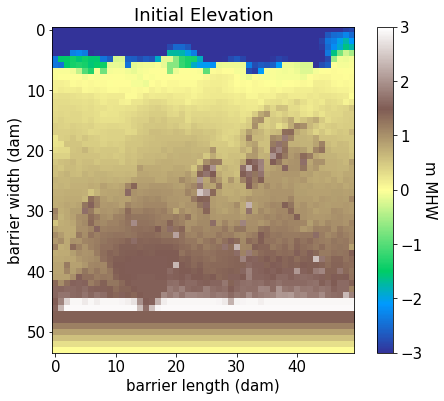

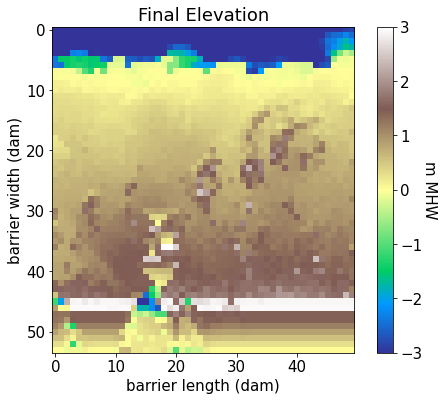

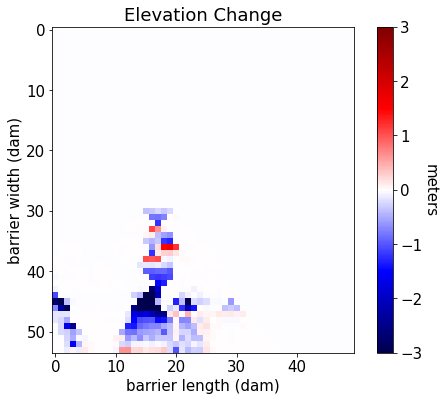

In [6]:
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams.update({"font.size": 15})

initial_domain = outwash3._initial_full_domain
final_domain = outwash3._full_domain
domain_change = final_domain-initial_domain

### ELEVATION PLOTS-------------------------------------------------------------------------------------------------------------
# plotting initial domain
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
mat = ax1.matshow(
    initial_domain*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
cbar = fig1.colorbar(mat)
cbar.set_label('m MHW', rotation=270, labelpad=15)
ax1.set_title("Initial Elevation")
ax1.set_ylabel("barrier width (dam)")
ax1.set_xlabel("barrier length (dam)")
plt.gca().xaxis.tick_bottom()

# plotting post storm elevation
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
mat2 = ax2.matshow(
    final_domain[:, :]*10,
    cmap="terrain",
    vmin=-3.0, vmax=3.0,
)
ax2.set_xlabel('barrier length (dam)')
ax2.set_ylabel('barrier width (dam)')
ax2.set_title("Final Elevation")
plt.gca().xaxis.tick_bottom()
cbar = fig2.colorbar(mat2)
cbar.set_label('m MHW', rotation=270, labelpad=15)

# plotting domain elevation change
domain_change = final_domain - initial_domain
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
mat3 = ax3.matshow(
    domain_change*10,
    cmap="seismic",
    vmin=-3, vmax=3,
)
ax3.set_xlabel('barrier length (dam)')
ax3.set_ylabel('barrier width (dam)')
ax3.set_title("Elevation Change")
plt.gca().xaxis.tick_bottom()
cbar = fig3.colorbar(mat3)
cbar.set_label('meters', rotation=270, labelpad=15)